# <center>Decision Trees and RF Employee Attrition Implementation

In [1]:
!pip install graphviz
!pip install pydotplus

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn import tree,metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
import statsmodels.api as sm
%matplotlib inline

In [3]:
os.chdir("D:/Imarticus/Supervised Learning/Decision Tree/Data shared by sir")
employee=pd.read_csv("D:/Imarticus/Supervised Learning/Decision Tree/Data shared by sir/employee.csv")

In [4]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee.shape

(1470, 35)

In [6]:
employee.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
print('The no of people who left the organization are about',(1-1233/1470)*100,'percent of total people')

The no of people who left the organization are about 16.12244897959184 percent of total people


In [8]:
employee.describe(include='number')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
employee=employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [11]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
employee.loc[employee['Attrition']=='No','Attrition']=0

In [14]:
employee.loc[employee['Attrition']=='Yes','Attrition']=1

In [15]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

<h3>tolist()</h3>

It used to convert the data elements of an array into a list. This function returns the array as an a. ndim- levels deep nested list of Python scalars. In simple words, this function returns a copy of the array elements as a Python list.

In [16]:
employee.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
employee_num=employee[employee.select_dtypes(include=[np.number]).columns.tolist()]

In [18]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [19]:
employee_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [20]:
employee_attr=employee[:]

In [21]:
employee_attr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
employee.drop(['Attrition'],axis=1,inplace=True)

In [23]:
employee_dummies=pd.get_dummies(employee[employee.select_dtypes(include=['object']).columns.tolist()])

In [24]:
employee_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [25]:
employee_combined=pd.concat([employee_num,employee_dummies],axis=1)

In [26]:
employee_combined.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [27]:
train_x=employee_combined

In [28]:
employee_attr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
train_y=employee_attr['Attrition']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=123)

In [31]:
x_train[0:2]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
553,40,804,2,1,4,86,2,1,4,2342,...,0,0,1,0,0,0,0,1,0,1
758,59,1089,1,2,2,66,3,3,4,11904,...,0,0,0,0,0,0,1,0,0,1


In [32]:
y_train[0:2] 

553    0
758    0
Name: Attrition, dtype: object

In [33]:
dt=tree.DecisionTreeClassifier( random_state=123) # Create model object

In [34]:
y_train.isna().sum()

0

In [35]:
x_train.shape

(1029, 51)

In [36]:
y_train=y_train.astype(np.number) # Converting it's type into numeric.

In [37]:
y_train.dtype

dtype('float64')

In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [39]:
y_pred=dt.predict(x_test)

In [40]:
y_pred[0:5]

array([1., 0., 0., 0., 0.])

In [41]:
y_pred=y_pred.astype(np.number)

<ipython-input-41-6847231512c8>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_pred=y_pred.astype(np.number)


In [42]:
y_test=y_test.astype(np.number)

In [43]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

print('Precision',metrics.precision_score(y_test,y_pred))

print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.8253968253968254
Precision 0.3484848484848485
Recall 0.40350877192982454


In [44]:
employee_attr.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

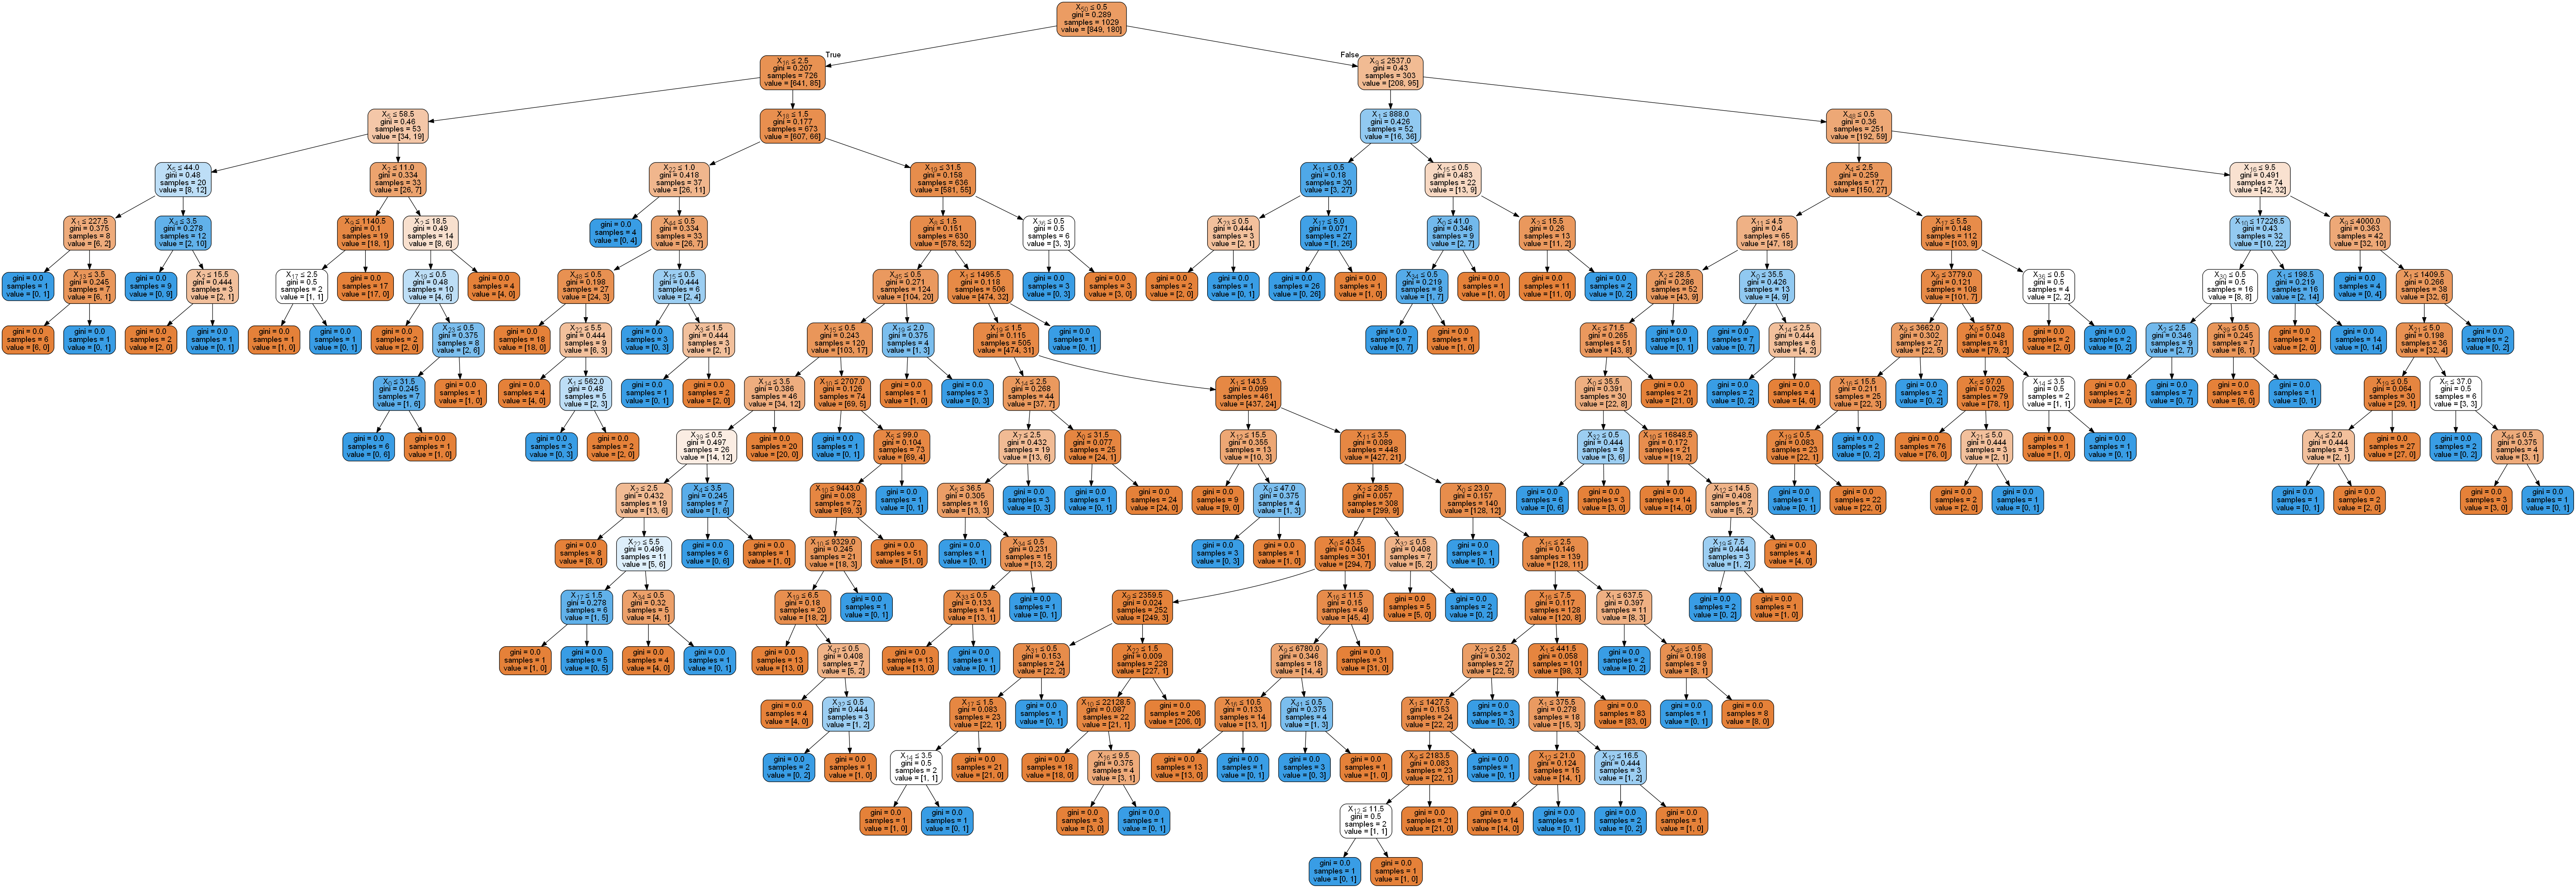

In [45]:
# plotting Tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Decision Tree Hyperparameter tuning

In [46]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#sp_randit use?

In [48]:
# Create function to generate model report for top 3 model.
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank:{0}'.format(i))
            print('Mean Validation score:{0:.3f}(std:{1:.3f})'.format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [49]:
# specify parameters and distribution to sample from
param_dist={"max_depth":[3,None],
           "max_features":sp_randint(1,11),
           "min_samples_split":sp_randint(2,11),
            "criterion":["gini","entropy"]}

In [50]:
#run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [51]:
start=time()
random_search.fit(x_train,y_train)
print("Randomized search too %.2f seconds for %d candidates" "Paraneters settings."%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.95 seconds for 20 candidatesParaneters settings.
Model with rank:1
Mean Validation score:0.832(std:0.010)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 9}

Model with rank:1
Mean Validation score:0.832(std:0.010)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 2}

Model with rank:3
Mean Validation score:0.827(std:0.013)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 9}

Model with rank:3
Mean Validation score:0.827(std:0.013)
Parameters:{'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 6}



In [52]:
random_search.cv_results_ # Breaking down the code

{'mean_fit_time': array([0.01017518, 0.01160345, 0.00438848, 0.00618334, 0.00558429,
        0.00598392, 0.0043879 , 0.00518589, 0.00518522, 0.00837717,
        0.00458827, 0.00458837, 0.00598288, 0.00491347, 0.0067811 ,
        0.004388  , 0.00418921, 0.00598207, 0.00568738, 0.00378976]),
 'std_fit_time': array([6.41321845e-03, 5.16086264e-03, 4.88696132e-04, 7.45920703e-04,
        7.98965630e-04, 8.92976367e-04, 4.87994491e-04, 3.99089041e-04,
        1.16268880e-03, 1.01638230e-03, 4.89415183e-04, 4.88908721e-04,
        8.12024420e-07, 5.23245314e-04, 1.16295018e-03, 1.35302832e-03,
        3.98421384e-04, 6.30224266e-04, 7.44589332e-04, 3.99162934e-04]),
 'mean_score_time': array([0.00369225, 0.00438814, 0.00279284, 0.00239387, 0.00249853,
        0.00259223, 0.00239401, 0.0025929 , 0.00279274, 0.00259385,
        0.00239282, 0.00199404, 0.00199504, 0.00199494, 0.00379009,
        0.00259318, 0.00219412, 0.00259514, 0.00279245, 0.00219417]),
 'std_score_time': array([9.81938484e-

#### <font color='red'>task (random_search.cv_results_,max_leaf_nodes=None)</font>

In [53]:
#Use a full grid of mentioned parameters
param_grid={"max_depth":[3,None],
           "max_features":[1,3,10],
           "min_samples_split":[2,3,10],
            "criterion":['gini','entropy']}

In [54]:
# run grid search
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [55]:
start=time()
grid_search.fit(x_train,y_train)
print("GridSearchCV too %.2f seconds for %d candidate parameter settings." %(time()-start,len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV too 1.49 seconds for 36 candidate parameter settings.
Model with rank:1
Mean Validation score:0.846(std:0.007)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 2}

Model with rank:1
Mean Validation score:0.846(std:0.007)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 3}

Model with rank:1
Mean Validation score:0.846(std:0.007)
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 10}



#### Note: From the above results we select the best parameters baseed on the model ranking either from random search or grid search.

In [56]:
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 2}

In [57]:
dt_grid_search=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_features=10,min_samples_split=2)

In [58]:
dt_grid_search.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10)

In [59]:
y_pred_gs=dt_grid_search.predict(x_test)

In [60]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))

print('Precision',metrics.precision_score(y_test,y_pred_gs))

print('Recall',metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.8843537414965986
Precision 0.625
Recall 0.2631578947368421


# Random Forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier()

In [107]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [108]:
ypred=rf.predict(x_test)

In [109]:
print(ypred.shape)
print(ypred[0:5])

(441,)
[1. 0. 0. 0. 0.]


In [110]:
rf.feature_importances_

array([0.05776796, 0.05262564, 0.04064235, 0.01871895, 0.03015849,
       0.04382639, 0.02463205, 0.02221128, 0.0265832 , 0.07318895,
       0.04562931, 0.03305335, 0.03126488, 0.0045895 , 0.02276056,
       0.0259887 , 0.05109867, 0.02656288, 0.02757028, 0.03940567,
       0.02780326, 0.02785753, 0.02732923, 0.00425855, 0.01232295,
       0.00854552, 0.00235416, 0.00723626, 0.00636684, 0.00271645,
       0.00752685, 0.00683529, 0.00748857, 0.00393176, 0.00826458,
       0.00909199, 0.00738848, 0.00369955, 0.00229786, 0.00999731,
       0.00151036, 0.00254608, 0.00068063, 0.00822097, 0.00512798,
       0.0065909 , 0.00572588, 0.00873862, 0.01481566, 0.02437385,
       0.03007704])

In [111]:
employee_combined.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [112]:
len(pos)

51

In [113]:
len(feature_importance)

51

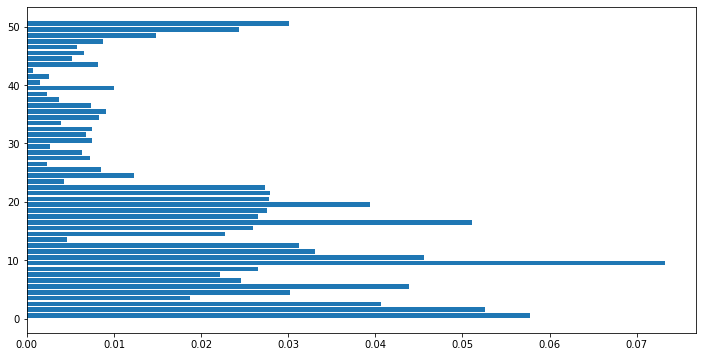

In [114]:
feature_importance= rf.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
fig=plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
plt.barh(pos,feature_importance, align='center')
#plt.yticks(pos,np.array(employee.columns))
#plt.title('Feature Importance (MDI)')

#result=permutation_importance(rf,x_test,y_test,n_repeats=10.random_state=42,n_jobs=2)
#sorted_idx=result.importance_mean.argsort()
#plt.subplot(1,2,2)
#plt.boxplot(result.importances[sorted_idx].T,vert=False,Labels=np.array(employee.columns)[sorted_idx])
#plt_title("permutation Importance (test set)")
#fig.tight_layout()
plt.show()

In [115]:
from sklearn import metrics

In [116]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

print('Precision',metrics.precision_score(y_test,y_pred))

print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.8253968253968254
Precision 0.3484848484848485
Recall 0.40350877192982454


## Random Forest Hyperparameter tuning

In [117]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [118]:
# Create function to generate model report for top 3 model.
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank:{0}'.format(i))
            print('Mean Validation score:{0:.3f}(std:{1:.3f})'.format(results['mean_test_score'][candidate],results['std_test_score'][candidate]))
            print("Parameters:{0}".format(results['params'][candidate]))
            print("")

In [119]:
# specify parameters and distribution to sample from
param_dist={"max_depth":[3,None],
           "max_features":sp_randint(1,11),
           "min_samples_split":sp_randint(2,11),
            "bootstrap":[True,False],
            "criterion":["gini","entropy"]}

In [150]:
#run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,cv=5,scoring='recall')

In [151]:
start=time()
random_search.fit(x_train,y_train)
print("Randomized search too %.2f seconds for %d candidates" "Paraneters settings."%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 32.04 seconds for 20 candidatesParaneters settings.
Model with rank:1
Mean Validation score:0.250(std:0.050)
Parameters:{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 4}

Model with rank:2
Mean Validation score:0.233(std:0.065)
Parameters:{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 5}

Model with rank:3
Mean Validation score:0.200(std:0.062)
Parameters:{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 9}



In [152]:
random_search.cv_results_ # Breaking down the code

{'mean_fit_time': array([0.44161201, 0.62853827, 0.25464506, 0.38797102, 0.38042464,
        0.27526803, 0.1999722 , 0.22989693, 0.16342359, 0.22759113,
        0.24532762, 0.15246658, 0.24355717, 0.24376912, 0.29600663,
        0.2413475 , 0.28454089, 0.41572785, 0.32952857, 0.2263577 ]),
 'std_fit_time': array([0.03347019, 0.05734957, 0.02271196, 0.0541979 , 0.02397507,
        0.01622475, 0.02256385, 0.00612049, 0.00294521, 0.01528838,
        0.00649477, 0.01993128, 0.02226812, 0.01646122, 0.00742333,
        0.00174367, 0.00336349, 0.00340266, 0.00401495, 0.00260827]),
 'mean_score_time': array([0.02134337, 0.03500948, 0.02872167, 0.02293878, 0.02413497,
        0.02134314, 0.02114444, 0.01914878, 0.01885076, 0.02114282,
        0.02094474, 0.0176558 , 0.01855469, 0.01954885, 0.01915212,
        0.01846538, 0.01825519, 0.01894245, 0.01875033, 0.01674738]),
 'std_score_time': array([3.13000736e-03, 2.53005877e-03, 3.36195632e-03, 4.96785981e-03,
        2.13008953e-03, 4.88694713e-

In [153]:
#Use a full grid of mentioned parameters
param_grid={"max_depth":[3,None],
           "max_features":[1,3,10],
           "min_samples_split":[2,3,10],
            "bootstrap":[True,False],
            "criterion":['gini','entropy']}

In [154]:
# run grid search
grid_search=GridSearchCV(rf,param_grid=param_grid,cv=5,scoring='recall')

#### Note :- We use scoring method to prioties as per requirement

In [155]:
start=time()
grid_search.fit(x_train,y_train)
print("GridSearchCV too %.2f seconds for %d candidate parameter settings." %(time()-start,len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV too 88.28 seconds for 72 candidate parameter settings.
Model with rank:1
Mean Validation score:0.267(std:0.057)
Parameters:{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 2}

Model with rank:2
Mean Validation score:0.250(std:0.066)
Parameters:{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank:2
Mean Validation score:0.250(std:0.061)
Parameters:{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}



In [156]:
# Select the best model Parameters 
Parameters:{'criterion': 'entropy', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 2}

In [157]:
rf_grid_search=RandomForestClassifier(criterion='entropy',max_depth=None,max_features=8,min_samples_split=2)

In [158]:
rf_grid_search.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=8)

In [159]:
y_pred_gs=rf_grid_search.predict(x_test)

In [160]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))

print('Precision',metrics.precision_score(y_test,y_pred_gs))

print('Recall',metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.9047619047619048
Precision 0.9411764705882353
Recall 0.2807017543859649


#### Note :- we had given recall as a priority but it improves a little because 0 and 1 in the target variable is not properly balanced as can be clearly seen below. the proportion of Zero repect to one is too large when we check from the value count.

In [162]:
train_y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [161]:
# Grid Search
Parameters:{'bootstrap':False,'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 7}
# Random Forest
Parameters:{'bootstrap':False,'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}